In [1]:
import sys
from ipywidgets import interact
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from download import download
import numpy as np
%matplotlib notebook

In [2]:
pd.set_option('display.max_rows', 50000)

In [5]:
df_bikes = pd.read_csv("../csv/accident-velo.csv", na_values="")

E:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (5,6,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df_bikes

,identifiant accident,date,mois,jour,heure,departement,commune,lat,lon,en agglomeration,...,existence securite,usage securite,obstacle fixe heurte,obstacle mobile heurte,localisation choc,manoeuvre avant accident,identifiant vehicule,type autres vehicules,manoeuvre autres vehicules,nombre autres vehicules
0,200500000030,2005-01-13,01 - janvier,3 - jeudi,19.0,62,62331,50.30000,2.84000,oui,...,NaN,NaN,NaN,Véhicule,Côté gauche,Changeant de file à gauche,200500000030B02,Transport en commun,Dépassant à gauche,1.0
1,200500000034,2005-01-19,01 - janvier,2 - mercredi,10.0,62,62022,0.00000,0.00000,non,...,NaN,NaN,NaN,Véhicule,Avant,Sans changement de direction,200500000034B02,"VU seul 1,5T <= PTAC <= 3,5T avec ou sans remo...",Tournant à gauche,1.0
2,200500000078,2005-01-26,01 - janvier,2 - mercredi,13.0,02,02173,0.00000,0.00000,non,...,Casque,Non,NaN,Véhicule,Avant,Sans changement de direction,200500000078B02,VL seul,Tournant à gauche,1.0
3,200500000093,2005-01-03,01 - janvier,0 - lundi,13.0,02,02810,49.25500,3.09400,oui,...,NaN,NaN,NaN,Véhicule,Avant gauche,Manœuvre d’évitement,200500000093B02,VL seul,Manœuvre d’évitement,1.0
4,200500000170,2005-01-29,01 - janvier,5 - samedi,18.0,76,76196,0.00000,0.00000,non,...,Autre,Oui,NaN,Véhicule,Arrière,"Même sens, même file",200500000170A01,"VU seul 1,5T <= PTAC <= 3,5T avec ou sans remo...","Même sens, même file",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65976,201800057521,2018-09-27,09 - septembre,3 - jeudi,8.0,974,97416,-21.29643,55.46052,non,...,Casque,Oui,NaN,Véhicule,Avant,"Même sens, même file",201800057521B01,VL seul,Tournant à gauche,1.0
65977,201800057582,2018-03-21,03 - mars,2 - mercredi,18.0,976,97611,-12.76833,45.22532,oui,...,Casque,Oui,NaN,Véhicule,Avant gauche,En s’insérant,201800057582B01,VL seul,"Même sens, même file",1.0
65978,201800057587,2018-03-31,03 - mars,5 - samedi,17.0,976,97611,-12.78604,45.22107,oui,...,Autre,Non déterminable,NaN,Véhicule,Côté gauche,NaN,201800057587B01,VL seul,Dépassant à gauche,1.0
65979,201800057587,2018-03-31,03 - mars,5 - samedi,17.0,976,97611,-12.78604,45.22107,oui,...,Autre,Non déterminable,NaN,Véhicule,Côté gauche,NaN,201800057587B01,VL seul,Dépassant à gauche,1.0


In [7]:
df_bikes["date"] = pd.to_datetime(df_bikes["date"])

In [8]:
df_bikes

,identifiant accident,date,mois,jour,heure,departement,commune,lat,lon,en agglomeration,...,existence securite,usage securite,obstacle fixe heurte,obstacle mobile heurte,localisation choc,manoeuvre avant accident,identifiant vehicule,type autres vehicules,manoeuvre autres vehicules,nombre autres vehicules
0,200500000030,2005-01-13,01 - janvier,3 - jeudi,19.0,62,62331,50.30000,2.84000,oui,...,NaN,NaN,NaN,Véhicule,Côté gauche,Changeant de file à gauche,200500000030B02,Transport en commun,Dépassant à gauche,1.0
1,200500000034,2005-01-19,01 - janvier,2 - mercredi,10.0,62,62022,0.00000,0.00000,non,...,NaN,NaN,NaN,Véhicule,Avant,Sans changement de direction,200500000034B02,"VU seul 1,5T <= PTAC <= 3,5T avec ou sans remo...",Tournant à gauche,1.0
2,200500000078,2005-01-26,01 - janvier,2 - mercredi,13.0,02,02173,0.00000,0.00000,non,...,Casque,Non,NaN,Véhicule,Avant,Sans changement de direction,200500000078B02,VL seul,Tournant à gauche,1.0
3,200500000093,2005-01-03,01 - janvier,0 - lundi,13.0,02,02810,49.25500,3.09400,oui,...,NaN,NaN,NaN,Véhicule,Avant gauche,Manœuvre d’évitement,200500000093B02,VL seul,Manœuvre d’évitement,1.0
4,200500000170,2005-01-29,01 - janvier,5 - samedi,18.0,76,76196,0.00000,0.00000,non,...,Autre,Oui,NaN,Véhicule,Arrière,"Même sens, même file",200500000170A01,"VU seul 1,5T <= PTAC <= 3,5T avec ou sans remo...","Même sens, même file",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65976,201800057521,2018-09-27,09 - septembre,3 - jeudi,8.0,974,97416,-21.29643,55.46052,non,...,Casque,Oui,NaN,Véhicule,Avant,"Même sens, même file",201800057521B01,VL seul,Tournant à gauche,1.0
65977,201800057582,2018-03-21,03 - mars,2 - mercredi,18.0,976,97611,-12.76833,45.22532,oui,...,Casque,Oui,NaN,Véhicule,Avant gauche,En s’insérant,201800057582B01,VL seul,"Même sens, même file",1.0
65978,201800057587,2018-03-31,03 - mars,5 - samedi,17.0,976,97611,-12.78604,45.22107,oui,...,Autre,Non déterminable,NaN,Véhicule,Côté gauche,NaN,201800057587B01,VL seul,Dépassant à gauche,1.0
65979,201800057587,2018-03-31,03 - mars,5 - samedi,17.0,976,97611,-12.78604,45.22107,oui,...,Autre,Non déterminable,NaN,Véhicule,Côté gauche,NaN,201800057587B01,VL seul,Dépassant à gauche,1.0


In [9]:
df_bikes_sort = df_bikes.sort_values(
    by=["date"])  # Trier les données par la date
df_bikes_sort

,identifiant accident,date,mois,jour,heure,departement,commune,lat,lon,en agglomeration,...,existence securite,usage securite,obstacle fixe heurte,obstacle mobile heurte,localisation choc,manoeuvre avant accident,identifiant vehicule,type autres vehicules,manoeuvre autres vehicules,nombre autres vehicules
35,200500000920,2005-01-01,01 - janvier,5 - samedi,14.0,42,42006,0.00000,0.00000,oui,...,NaN,NaN,NaN,NaN,Arrière,Sans changement de direction,200500000920B02,VL seul,Sans changement de direction,1.0
36,200500000920,2005-01-01,01 - janvier,5 - samedi,14.0,42,42006,0.00000,0.00000,oui,...,Casque,NaN,NaN,NaN,Arrière,NaN,200500000920C03,VL seul,Sans changement de direction,1.0
103,200500003041,2005-01-01,01 - janvier,5 - samedi,3.0,31,31555,0.00000,0.00000,oui,...,Casque,Non,NaN,Véhicule,Avant droit,"Même sens, même file",200500003041B01,VL seul,"Même sens, même file",1.0
147,200500003464,2005-01-01,01 - janvier,5 - samedi,17.0,42,42071,0.00000,0.00000,oui,...,Casque,Oui,NaN,Véhicule,Avant,Sans changement de direction,200500003464B01,VL seul,Tournant à gauche,1.0
287,200500006086,2005-01-02,01 - janvier,6 - dimanche,12.0,94,94043,0.00000,0.00000,oui,...,Autre,Non déterminable,NaN,Véhicule,Avant,"Même sens, même file",200500006086B01,VL seul,"Même sens, même file",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63529,201800001763,2018-12-27,12 - décembre,3 - jeudi,16.0,69,69068,45.84802,4.83190,oui,...,Casque,Oui,NaN,Véhicule,Avant,NaN,201800001763B01,VL seul,Tournant à gauche,1.0
64204,201800014556,2018-12-28,12 - décembre,4 - vendredi,20.0,15,15079,45.25710,2.34327,non,...,Casque,NaN,Autre obstacle fixe sur trottoir ou accotement,NaN,NaN,Déporté à gauche,201800014556A01,NaN,NaN,NaN
64474,201800017595,2018-12-29,12 - décembre,5 - samedi,7.0,11,11206,43.05908,2.19798,non,...,Casque,Non,"Fossé, talus, paroi rocheuse",Véhicule,Avant gauche,Sans changement de direction,201800017595A01,VL seul,Sans changement de direction,1.0
64009,201800012138,2018-12-29,12 - décembre,5 - samedi,11.0,53,53264,48.00631,-0.33041,non,...,Casque,Oui,NaN,Animal domestique,Avant,Sans changement de direction,201800012138A01,NaN,NaN,NaN


In [10]:
# Compter le nombre d'accident par jour
df_bikes_date = pd.DataFrame(df_bikes_sort.groupby(
    "date").count()["identifiant accident"])
df_bikes_date

,identifiant accident
date,
2005-01-01,4
2005-01-02,6
2005-01-03,11
2005-01-04,17
2005-01-05,10
2005-01-06,13
2005-01-07,14
2005-01-08,13
2005-01-09,6


In [11]:
df_bikes_day = df_bikes_date.groupby(
    df_bikes_date.index.year)  # regrouper les data par l'année

In [12]:
# On prend le groupe de l'année 2005
df_bikes_2005 = df_bikes_day.get_group(2005)
df_bikes_2005

,identifiant accident
date,
2005-01-01,4
2005-01-02,6
2005-01-03,11
2005-01-04,17
2005-01-05,10
2005-01-06,13
2005-01-07,14
2005-01-08,13
2005-01-09,6


In [13]:
datamissing = pd.to_datetime(pd.date_range(start='2005-01-01',
                                           end='2005-12-31').difference(df_bikes_2005.index))  # Trouver les dates où il n'y a pas d'accident (dates manquantes)

In [14]:
datamissing

DatetimeIndex(['2005-12-24'], dtype='datetime64[ns]', freq=None)

In [15]:
data = {"identifiant accident": 0}
# remplacer le nombre d'accident par 0 pour les dates manquantes et trier les données selon la date
df_bikes_2005 = df_bikes_2005.append(pd.DataFrame(data, index=datamissing))
df_bikes_2005 = df_bikes_2005.sort_index(axis=0)
df_bikes_2005

,identifiant accident
2005-01-01,4
2005-01-02,6
2005-01-03,11
2005-01-04,17
2005-01-05,10
2005-01-06,13
2005-01-07,14
2005-01-08,13
2005-01-09,6
2005-01-10,21


In [16]:
df_bikes_2005 = df_bikes_2005.rename(
    columns={"identifiant accident": "2005"})  # renommer la colonne
df_bikes_2005

,2005
2005-01-01,4
2005-01-02,6
2005-01-03,11
2005-01-04,17
2005-01-05,10
2005-01-06,13
2005-01-07,14
2005-01-08,13
2005-01-09,6
2005-01-10,21


On fait la même chose pour l'année 2006-2017, mais il y a des année bissextiles (2008,2012,2016), donc dans ce cas on supprime le 29 fevrier. On met tous les données dans le dataframe de 2005. 

In [17]:
def create_df_day(year, leap_year, df_bikes_day, df_bikes_2005):
    df_bikes_year = df_bikes_day.get_group(year)
    year_start = str(year)+'-01-01'
    year_end = str(year)+'-12-31'
    datamissing = pd.to_datetime(pd.date_range(start=year_start,
                                               end=year_end).difference(df_bikes_year.index))
    if year in leap_year:
        extra_date = str(year)+'-02-29'
        df_bikes_year = df_bikes_year.drop(pd.to_datetime(extra_date))
    data = {"identifiant accident": 0}
    df_bikes_year = df_bikes_year.append(pd.DataFrame(data, index=datamissing))
    df_bikes_year = df_bikes_year.sort_index(axis=0)
    df_bikes_2005[year] = df_bikes_year["identifiant accident"].values
    return(df_bikes_2005)

In [18]:
leap_year = [2008, 2012, 2016]
for year in range(2006, 2018):
    df_bikes_2005 = create_df_day(year, leap_year, df_bikes_day, df_bikes_2005)
df_bikes_2005

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
2005-01-01,4,3,7,6,5,0,2,3,1,0,3,3,5
2005-01-02,6,5,8,3,4,8,4,7,6,10,6,4,5
2005-01-03,11,10,9,4,5,0,10,8,7,4,3,3,12
2005-01-04,17,14,5,10,6,8,5,8,4,5,8,5,20
2005-01-05,10,9,8,7,6,11,2,7,5,6,7,10,16
2005-01-06,13,11,7,8,10,10,6,12,3,7,8,13,7
2005-01-07,14,3,6,9,8,3,12,2,10,13,8,12,2
2005-01-08,13,4,14,19,11,7,7,4,12,12,9,16,3
2005-01-09,6,12,19,13,7,2,3,7,9,10,10,11,8
2005-01-10,21,18,16,10,6,3,9,14,14,17,7,4,11


In [19]:
df_bikes_2005.shape

(365, 13)

In [20]:
df_bikes_2005['mean'] = df_bikes_2005.mean(axis=1) # Calculer la moyenne de chaque ligne (cela sera la moyenne par jour)
df_bikes_2005 # df_bikes_2005['mean'] sera input

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,mean
2005-01-01,4,3,7,6,5,0,2,3,1,0,3,3,5,3.230769
2005-01-02,6,5,8,3,4,8,4,7,6,10,6,4,5,5.846154
2005-01-03,11,10,9,4,5,0,10,8,7,4,3,3,12,6.615385
2005-01-04,17,14,5,10,6,8,5,8,4,5,8,5,20,8.846154
2005-01-05,10,9,8,7,6,11,2,7,5,6,7,10,16,8.000000
2005-01-06,13,11,7,8,10,10,6,12,3,7,8,13,7,8.846154
2005-01-07,14,3,6,9,8,3,12,2,10,13,8,12,2,7.846154
2005-01-08,13,4,14,19,11,7,7,4,12,12,9,16,3,10.076923
2005-01-09,6,12,19,13,7,2,3,7,9,10,10,11,8,9.000000
2005-01-10,21,18,16,10,6,3,9,14,14,17,7,4,11,11.538462


In [21]:
# On fait la meme chose pour 2018 
df_bikes_2018 = df_bikes_day.get_group(2018)
datamissing = pd.to_datetime(pd.date_range(start = '2018-01-01', 
            end = '2018-12-31' ).difference(df_bikes_2018.index))
data = {"identifiant accident":0}
df_bikes_2018 = df_bikes_2018.append(pd.DataFrame(data,index=datamissing))
df_bikes_2018 = df_bikes_2018.sort_index(axis = 0)
df_bikes_2018 # output

,identifiant accident
2018-01-01,2
2018-01-02,5
2018-01-03,5
2018-01-04,1
2018-01-05,12
2018-01-06,6
2018-01-07,2
2018-01-08,14
2018-01-09,9
2018-01-10,10


In [22]:
df_bikes_2018.shape

(365, 1)

## Plot data

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys

<IPython.core.display.Javascript object>


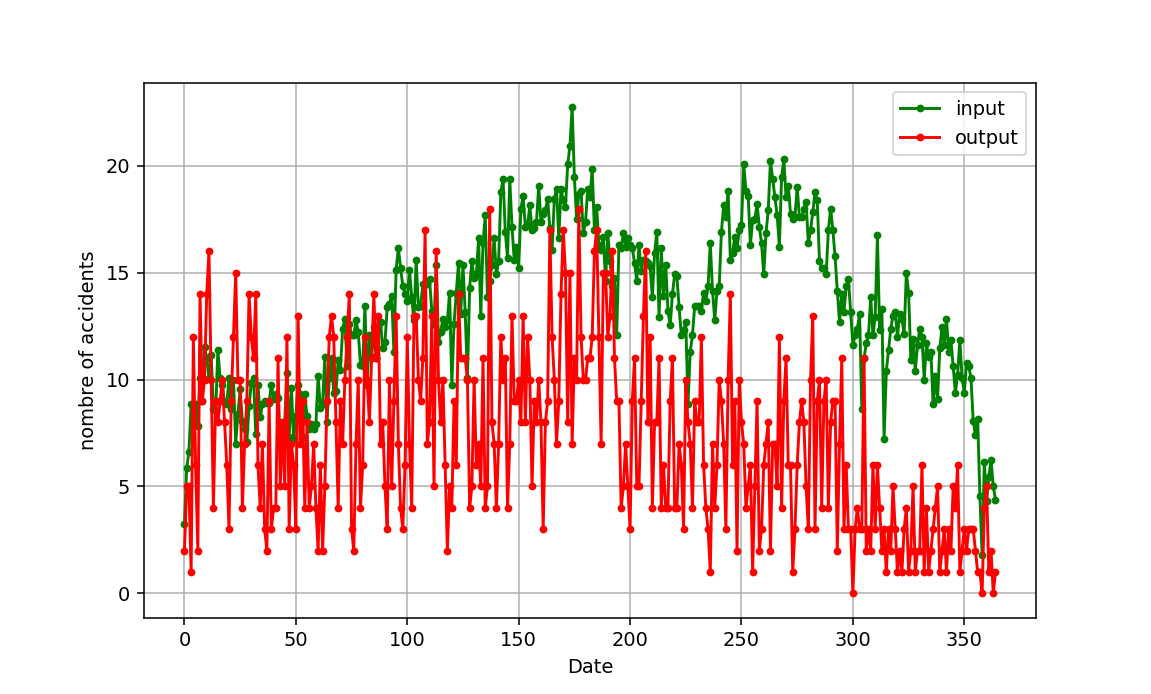

In [24]:
fig = plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.plot(df_bikes_2005['mean'].values, "g.-", label="input")
ax.plot(df_bikes_2018["identifiant accident"].values, "r.-", label="output")
ax.set_xlabel("Date")
ax.set_ylabel("nombre of accidents")
ax.legend()
plt.grid()

#### Moving average

In [25]:
np.set_printoptions(threshold=sys.maxsize)

In [26]:
width = 7  # fenetre = 7 (on peut le modifier)
raw_x = np.array(df_bikes_2005['mean'].values)  # input
raw_y = np.array(df_bikes_2018["identifiant accident"].values)  # output
T = len(raw_x)
# Construire la matrice A
A = np.zeros((T, width))
A[0:, 0] = raw_x[0:]
for i in range(1, width):
    A[i:, i] = raw_x[0:-i]
# Donc on a raw_y(output) ~= Aw, on voudrais chercher w, une solution optimale sera le pseudo-inverse de A

In [27]:
A

array([[ 3.23076923,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 5.84615385,  3.23076923,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 6.61538462,  5.84615385,  3.23076923,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 8.84615385,  6.61538462,  5.84615385,  3.23076923,  0.        ,
         0.        ,  0.        ],
       [ 8.        ,  8.84615385,  6.61538462,  5.84615385,  3.23076923,
         0.        ,  0.        ],
       [ 8.84615385,  8.        ,  8.84615385,  6.61538462,  5.84615385,
         3.23076923,  0.        ],
       [ 7.84615385,  8.84615385,  8.        ,  8.84615385,  6.61538462,
         5.84615385,  3.23076923],
       [10.07692308,  7.84615385,  8.84615385,  8.        ,  8.84615385,
         6.61538462,  5.84615385],
       [ 9.        , 10.07692308,  7.84615385,  8.84615385,  8.        ,
         8.84615385,  6.61538462],
       [11.53846154,  9.    

In [28]:
wop = np.dot(np.linalg.pinv(A), raw_y)  # On calcule w
wop

array([ 0.29387307,  0.09569273,  0.07702583,  0.13618202,  0.03175052,
       -0.04692312, -0.07000756])

In [29]:
y_pred = np.dot(A, wop)
y_pred

array([ 0.94943608,  2.02718831,  2.75237048,  4.12296813,  4.60577228,
        4.98148765,  4.6827235 ,  5.04417522,  4.79397759,  5.38295349,
        5.67624869,  5.46083795,  5.92434233,  5.11194033,  4.74285062,
        5.3412747 ,  4.99292036,  4.91960536,  4.96964594,  4.93597294,
        5.01353892,  4.43299109,  4.86347956,  4.22819301,  4.3575561 ,
        4.68784934,  4.09324134,  4.05988704,  3.97459213,  4.36605481,
        4.54721662,  4.74022451,  4.40795642,  5.10981792,  4.70637541,
        4.39990447,  4.53050749,  4.54035036,  4.65460947,  4.84846959,
        4.7992271 ,  4.81322799,  4.84484413,  4.17551675,  4.11550648,
        4.06446411,  4.56939125,  3.94122593,  4.67973534,  4.40927312,
        4.28251828,  4.72059156,  4.53550944,  4.18885699,  4.73323311,
        4.57665371,  4.02317685,  4.08328114,  4.04362313,  4.0377463 ,
        4.61641289,  4.49293342,  4.62646565,  5.48996494,  4.6881786 ,
        5.02963431,  5.48373022,  5.00422692,  5.0130534 ,  5.50

<IPython.core.display.Javascript object>


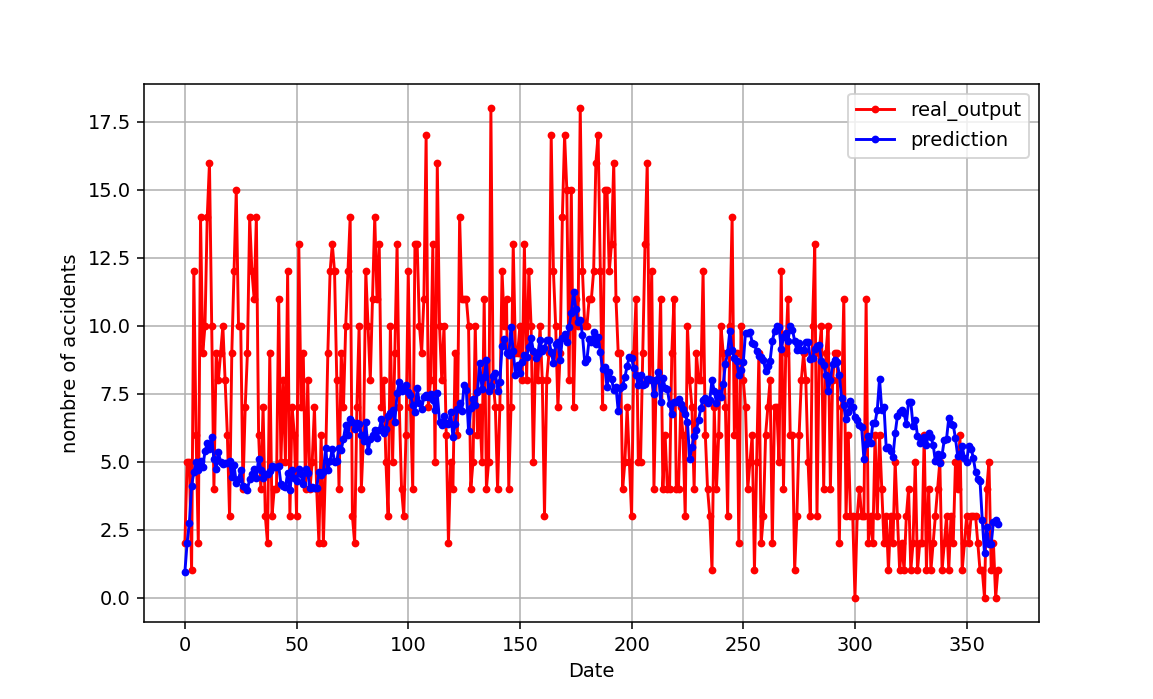

In [30]:
fig = plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.plot(df_bikes_2018["identifiant accident"].values,
        "r.-", label="real_output")
ax.plot(y_pred, "b.-", label="prediction")
ax.set_xlabel("Date")
ax.set_ylabel("nombre of accidents")
ax.legend()
plt.grid()

#### Error

In [31]:
err = []
max_window = 365
raw_x = np.array(df_bikes_2005['mean'].values)
raw_y = np.array(df_bikes_2018["identifiant accident"].values)
T = len(raw_x)
for width in range(1, max_window+1):
    A = np.zeros((T, width))
    A[0:, 0] = raw_x[0:]
    for i in range(1, width):
        A[i:, i] = raw_x[0:-i]
    wop = np.dot(np.linalg.pinv(A), raw_y)
    y_pred = np.dot(A, wop)
    err.append(np.linalg.norm(y_pred-raw_y))  # On calcule erreur
err

[75.57823948574928,
 75.35949369152979,
 75.28163775214047,
 75.22732931689919,
 75.22362203028928,
 75.18467598804264,
 75.15762056273887,
 75.08674255482269,
 74.97234628985579,
 74.67623504577648,
 74.24997528979256,
 74.23974622037572,
 74.21317412464568,
 74.12644192342827,
 73.75675586241411,
 73.55720614775834,
 73.47007764379569,
 72.98095889900262,
 72.94162515130051,
 72.7089127893795,
 72.7056644502329,
 72.16778515088325,
 71.82124536688053,
 71.3345895640151,
 70.93750869572675,
 70.87362855097336,
 70.87232055058072,
 70.266198240105,
 70.16857740835508,
 70.08233335562636,
 69.88642129845655,
 69.26017658372635,
 68.97380082403724,
 68.96646774000413,
 68.96049222694357,
 68.94606855710384,
 68.84178861718077,
 68.41323153980008,
 68.15129984189726,
 68.11234954604245,
 68.06107892747478,
 68.06061996218695,
 67.9645268540355,
 67.65163612023295,
 67.03478875461815,
 67.01534665379548,
 66.9959456906059,
 66.60026736163539,
 66.57982946999128,
 66.46241109239008,
 65.872

<IPython.core.display.Javascript object>


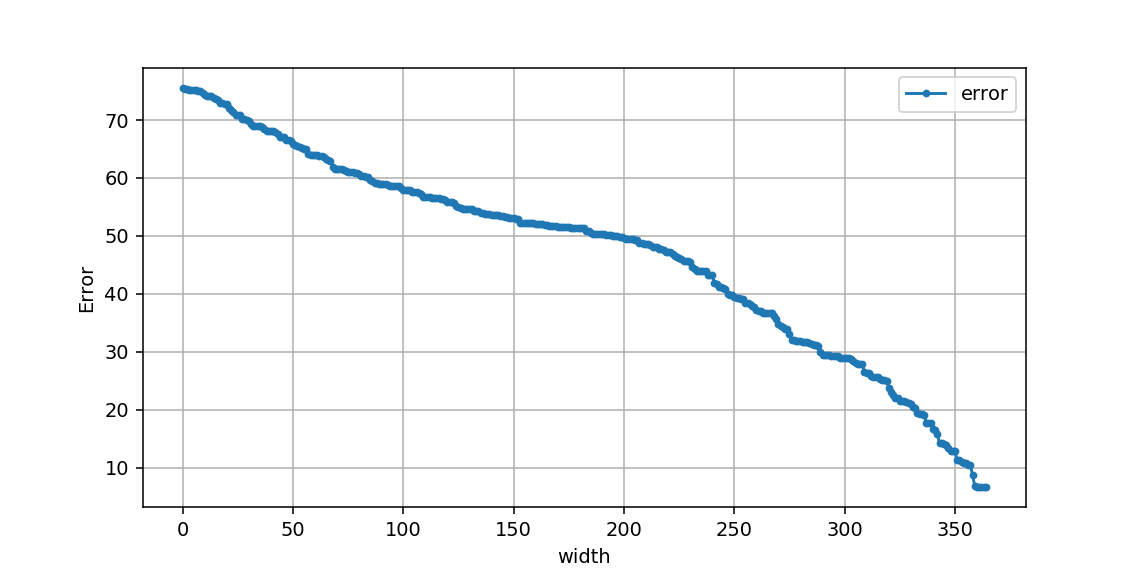

In [32]:
fig = plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.plot(err, ".-", label="error")
ax.set_xlabel("width")
ax.set_ylabel("Error")
ax.legend()
plt.grid()